In [2]:
#爬取数据document2010-2019.csv 分析与清理纪录片板块
import numpy as np
import pandas as pd
#豆瓣记录片基本信息-显示数据
df = pd.read_csv('document2010-2019.csv',encoding='utf8')
df.head(250)

,index,drama_title,drama_directors,drama_casts,drama_rate,drama_url,drama_country,drama_language_list,drama_time
0,1,五月天人生无限公司,陈奕仁,"温尚翊,石锦航,蔡升晏,刘冠佑,陈信宏",8.7,https://movie.douban.com/subject/30310435/,台湾,NaN,2019
1,2,二十二,郭柯,"韦绍兰,罗善学",8.7,https://movie.douban.com/subject/26430107/,中国大陆,NaN,2015
2,3,四个春天,陆庆屹,"陆运坤,李桂贤",8.9,https://movie.douban.com/subject/27191492/,中国大陆,NaN,2017
3,4,人生果实,伏原健之,"津端修一,津端英子,树木希林",9.6,https://movie.douban.com/subject/26874505/,日本,NaN,2017
4,5,徒手攀岩,"金国威,伊丽莎白·柴·瓦沙瑞莉","亚历克斯·霍诺尔德,金国威,汤米·考德威尔",9.1,https://movie.douban.com/subject/30167509/,美国,NaN,2018
5,6,早餐中国,"王圣志,沈宏非",NaN,7.8,https://movie.douban.com/subject/33393084/,中国大陆,汉语普通话,2019
6,7,人生一串 第一季,张岳明,NaN,9.0,https://movie.douban.com/subject/27040844/,中国大陆,汉语普通话,2018
7,8,阿波罗11号,托德·道格拉斯·米勒,"巴兹·奥德林,琼·安·阿彻,珍妮特·阿姆斯特朗,尼尔·阿姆斯特朗,约翰尼·卡森",8.8,https://movie.douban.com/subject/30390701/,美国,NaN,2019
8,9,张艺谋和他的“影”,汪鹏,"张艺谋,赵小丁,陈敏正,马光荣,谷轩昭",7.1,https://movie.douban.com/subject/30255138/,中国大陆,NaN,2018
9,10,我在故宫修文物,"叶君,萧寒","王津,亓昊楠,屈峰,王五胜,王有亮",9.4,https://movie.douban.com/subject/26703457/,中国大陆,汉语普通话,2016


In [3]:
#查看数据的基本信息情况
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
index                  400 non-null int64
drama_title            400 non-null object
drama_directors        386 non-null object
drama_casts            313 non-null object
drama_rate             371 non-null float64
 drama_url             400 non-null object
drama_country          400 non-null object
drama_language_list    166 non-null object
drama_time             400 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 28.2+ KB


In [4]:
#重复性检查
df.duplicated().value_counts()

False    400
dtype: int64

In [5]:
#查看是否有重复纪律片的名字 ，导演名字，表示有重复的字
len(df.drama_title.unique())


38

In [6]:
len(df.drama_directors.unique())

38

In [7]:
#统计制片国家 有的影片是有多个国家的  apply函数合并  pd.Series--->数据用一维数组表示
country =df['drama_country'].str.split('/').apply(pd.Series)
country.head(200)

,0,1,2
0,台湾,NaN,NaN
1,中国大陆,NaN,NaN
2,中国大陆,NaN,NaN
3,日本,NaN,NaN
4,美国,NaN,NaN
5,中国大陆,NaN,NaN
6,中国大陆,NaN,NaN
7,美国,NaN,NaN
8,中国大陆,NaN,NaN
9,中国大陆,NaN,NaN


In [8]:
#接上一不将内部的空的nan变成0
all_country = country.apply(pd.value_counts).fillna('0')
all_country.head(200)

,0,1,2
中国大陆,235,0,13
中国大陆,18,0,0
台湾,1,0,0
土耳其,4,0,0
巴西,0,0,16
意大利,0,16,0
日本,11,0,0
法国,15,0,0
法国,16,0,0
澳门,0,0,18


In [9]:
#统计每个国家的制片数量在250中的情况
#增加一列计算counts
all_country.columns = ['area1','area2','area3']
all_country['area1'] = all_country['area1'].astype(int)
all_country['area2'] = all_country['area2'].astype(int)
all_country['area3'] = all_country['area3'].astype(int)
#对制片国家地区进行排序 求和
all_country['all_counts'] = all_country['area1']+all_country['area2']+all_country['area3']
#降序
all_country.sort_values(['all_counts'],ascending=False)
all_country.head()

,area1,area2,area3,all_counts
中国大陆,235,0,13,248
中国大陆,18,0,0,18
台湾,1,0,0,1
土耳其,4,0,0,4
巴西,0,0,16,16


In [10]:
##########################################
#按评分来排序电影？？？？？？？？？
country =df['drama_time'].apply(pd.Series)
country.head()


,0
0,2019
1,2015
2,2017
3,2017
4,2018


In [11]:
#  探究在所获取的数据中导演chuvalue_counts()返回一个Series 序列
director = df['drama_directors'].value_counts()
#series 转dataframe 可以使用字典的方式
myDirector = pd.DataFrame({'name':director.index,'counts':director.values})
myDirector.head(200)


,counts,name
0,20,"秦博,范士广,谢抒豪"
1,19,萧寒
2,19,"张力,金蓓"
3,18,艾雷斯泰·法瑟吉尔
4,18,闫东
5,17,大卫·贾柏
6,17,"陈晓卿,任长箴,程工"
7,16,埃里卡·詹金
8,16,"维姆·文德斯,朱利安·诺里贝罗·萨尔加多"
9,15,亦风


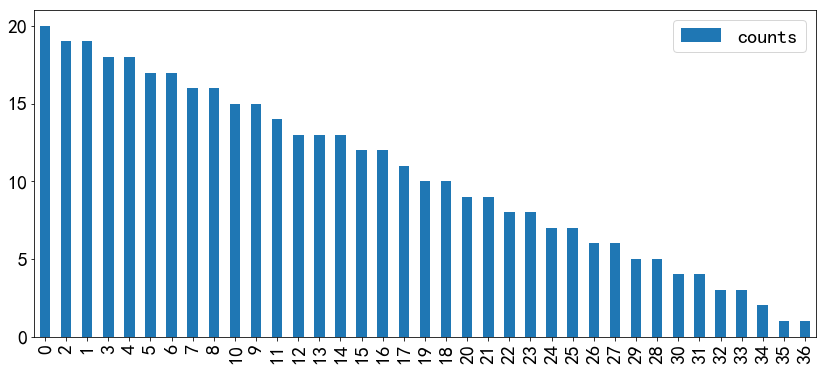

In [12]:
#用柱状图来显示导演的分布情况
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
#配置中文字体和修改字体大小
myDirector = pd.DataFrame({'counts':director.values})
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['font.size'] = 20
plt.figure(figsize=(20,5))
myDirector.sort_values(by='counts',ascending=False).plot(kind='bar',figsize=(14,6))

 

In [13]:
#查看表的基本信息
print(df.values)

[[1 '五月天人生无限公司' '陈奕仁' ..., ' 台湾' nan 2019]
 [2 '二十二' '郭柯' ..., ' 中国大陆' nan 2015]
 [3 '四个春天' '陆庆屹' ..., ' 中国大陆' nan 2017]
 ..., 
 [398 '冰血长津湖' '颜品,付勇,刘治寰' ..., ' 中国大陆' nan 2011]
 [399 '舌尖上的新年' '陈磊,邓洁,李勇' ..., ' 中国大陆' nan 2016]
 [400 '那天，大海' '金智永' ..., ' 韩国' nan 2018]]


In [14]:
#查看表的列名
print(df.columns)

Index(['index', 'drama_title', 'drama_directors', 'drama_casts', 'drama_rate',
       ' drama_url', 'drama_country', 'drama_language_list', 'drama_time'],
      dtype='object')


In [15]:
#查看表的数据类型
print(df.dtypes)

index                    int64
drama_title             object
drama_directors         object
drama_casts             object
drama_rate             float64
 drama_url              object
drama_country           object
drama_language_list     object
drama_time               int64
dtype: object


In [16]:
#查看表的元素个数及dataframe的形状
print(df.size)
print(df.shape)

3600
(400, 9)


In [17]:
#取出纪录片名字一列，和豆瓣评分的一列
document_name=df[['drama_title','drama_rate']][:10]

print(document_name)

  drama_title  drama_rate
0   五月天人生无限公司         8.7
1         二十二         8.7
2        四个春天         8.9
3        人生果实         9.6
4        徒手攀岩         9.1
5        早餐中国         7.8
6    人生一串 第一季         9.0
7      阿波罗11号         8.8
8   张艺谋和他的“影”         7.1
9     我在故宫修文物         9.4


In [18]:
#描述性统计-----纪录片豆瓣评分
#计算数据的豆瓣平均分
mean1=np.mean(df['drama_rate'])
max1=np.max(df['drama_rate'])
print('纪录片豆瓣评分的描述性统计为：\n', df['drama_rate'].describe())

纪录片豆瓣评分的描述性统计为：
 count    371.000000
mean       8.753369
std        0.808942
min        6.300000
25%        8.300000
50%        8.900000
75%        9.400000
max        9.800000
Name: drama_rate, dtype: float64


In [19]:
#计算纪录片导演出现次数出现最多的前20名,以及出现的次数
print('纪录片导演出现次数出现最多的前20名：\n',
      df['drama_directors'].value_counts()[0:20])

纪录片导演出现次数出现最多的前20名：
 秦博,范士广,谢抒豪                             20
萧寒                                     19
张力,金蓓                                  19
艾雷斯泰·法瑟吉尔                              18
闫东                                     18
大卫·贾柏                                  17
陈晓卿,任长箴,程工                             17
埃里卡·詹金                                 16
维姆·文德斯,朱利安·诺里贝罗·萨尔加多                   16
亦风                                     15
阿涅斯·瓦尔达,JR                             15
周全                                     14
陆川                                     13
郭柯                                     13
郭滢,樊志远,桂平,田荣,李德刚,詹先玲,王雅丽,韩金娜,何伟,杨光伟    13
关琇,萧屺楠                                 12
陈晓卿,陈磊                                 12
聿馨                                     11
叶君,萧寒                                  10
赵启辰                                    10
Name: drama_directors, dtype: int64


In [20]:
#计算纪录片豆瓣评分排名的前10名的纪录片
print('纪录片豆瓣评分排名的前10名的纪录片：\n',
      df.sort_values(by=['drama_rate','drama_title'], ascending=False)[0:20])

纪录片豆瓣评分排名的前10名的纪录片：
      index drama_title drama_directors drama_casts  drama_rate  \
17      18       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
36      37       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
55      56       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
74      75       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
93      94       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
112    113       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
131    132       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
150    151       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
169    170       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
188    189       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
207    208       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
226    227       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
245    246       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒         9.8   
264    265       我们的星球       艾雷斯泰·法瑟吉尔     戴维·阿滕伯勒     

In [21]:
#转化类型为category
df['drama_title'] = df['drama_title'].astype('category')
print('纪录片更改类型：',df['drama_title'].dtypes)

纪录片更改类型： category


In [22]:
# category类型特征的描述性统计
print('纪录片描述统计结果为：\n',
      df['drama_title'].describe())

纪录片描述统计结果为：
 count         400
unique         38
top       我在故宫修文物
freq           29
Name: drama_title, dtype: object


In [23]:
#转化类型为category
df['drama_directors'] = df['drama_directors'].astype('category')
print('纪录片更改类型：',df['drama_directors'].dtypes)
# category类型特征的描述性统计
print('纪录片导演次数描述统计结果为：\n',
      df['drama_directors'].describe())

纪录片更改类型： category
纪录片导演次数描述统计结果为：
 count            386
unique            37
top       秦博,范士广,谢抒豪
freq              20
Name: drama_directors, dtype: object


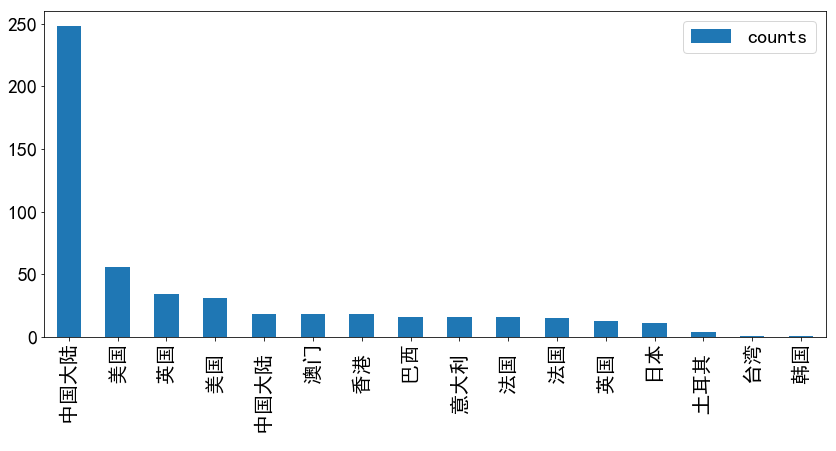

In [24]:
#可视化 （1）纪录片的出品国家的分布情况---条形图
#配置中文字体和修改字体大小
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['font.size'] = 20

country_rank = pd.DataFrame({'counts':all_country['all_counts']})
country_rank
country_rank.sort_values(by='counts',ascending=False).plot(kind='bar',figsize=(14,6))
country_rank
plt.figure(figsize=(6,6))

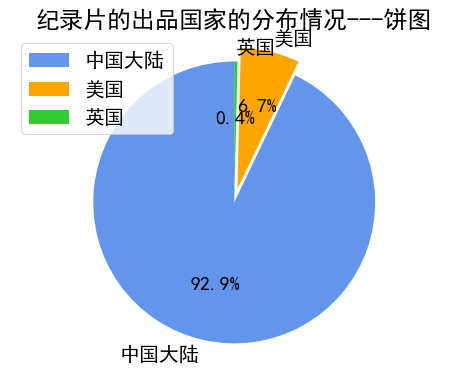

In [37]:
#可视化 （1）纪录片的出品国家的分布情况---饼图
label=['中国大陆','美国','英国']
values=country_rank ['counts'].values
plt.figure(figsize=(8, 6))
#explode=[0.01,0.01,0.01]
explode = (0, 0.1, 0)
colors = ['cornflowerblue','orange','limegreen']
plt.pie(values[:3],explode=explode, labels=label, colors=colors,autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('纪录片的出品国家的分布情况---饼图')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()


In [26]:
#将纪录片表变为透视表-会自动筛选数值的列
import numpy as np
detailPivot = pd.pivot_table(df[['drama_rate','drama_time','drama_title']], index = ['drama_title'],aggfunc = np.min)
print('以order_id作为分组键创建的订单透视表为:',detailPivot.head(25))

以order_id作为分组键创建的订单透视表为:              drama_rate  drama_time
drama_title                        
三十二                 9.4        2014
二十二                 8.7        2015
五月天人生无限公司           8.7        2019
人生一串 第一季            9.0        2018
人生果实                9.6        2017
人间世 第一季             9.6        2016
人间世 第二季             9.6        2019
冰血长津湖               9.2        2011
囚                   9.2        2017
四个春天                8.9        2017
地球之盐                9.2        2014
坂本龙一：终曲             8.9        2017
寿司之神                8.7        2011
尺八·一声一世             NaN        2019
张艺谋和他的“影”           7.1        2018
徒手攀岩                9.1        2018
我们的星球               9.8        2019
我们诞生在中国             8.0        2016
我在故宫修文物             7.6        2016
日本之耻                9.1        2018
早餐中国                7.8        2019
河西走廊                9.6        2015
浮生一日                8.8        2011
海昏侯                 8.7        2019
港珠澳大桥               NaN        2019


In [27]:
#将纪录片表变为透视表-会透视表中的缺失值进行填充
import numpy as np
detailPivot2 = pd.pivot_table(df[['drama_rate','drama_time','drama_title']], index = ['drama_title'],fill_value=0)
print('以order_id作为分组键创建的订单透视表为:',detailPivot2.head(25))

以order_id作为分组键创建的订单透视表为:              drama_rate  drama_time
drama_title                        
三十二             9.40000        2014
二十二             8.70000        2015
五月天人生无限公司       8.70000        2019
人生一串 第一季        9.00000        2018
人生果实            9.60000        2017
人间世 第一季         9.60000        2016
人间世 第二季         9.60000        2019
冰血长津湖           9.20000        2011
囚               9.20000        2017
四个春天            8.90000        2017
地球之盐            9.20000        2014
坂本龙一：终曲         8.90000        2017
寿司之神            8.70000        2011
尺八·一声一世         0.00000        2019
张艺谋和他的“影”       7.10000        2018
徒手攀岩            9.10000        2018
我们的星球           9.80000        2019
我们诞生在中国         8.00000        2016
我在故宫修文物         8.22069        2016
日本之耻            9.10000        2018
早餐中国            7.80000        2019
河西走廊            9.60000        2015
浮生一日            8.80000        2011
海昏侯             8.70000        2019
港珠澳大桥           0.00000        2019


In [28]:
#将纪录片表变为透视表-crosstab函数创建交叉表--可以了解具体的年份中主要有哪些纪录片的评分情况
import numpy as np
detailCross = pd.crosstab(index=df['drama_title'],columns = df[ 'drama_time'],
                                   values = df['drama_rate'],aggfunc= np.max)
print('以order_id作为分组键创建的透视表为:\n',detailCross.iloc[:10,:10])

以order_id作为分组键创建的订单透视表为:
 drama_time   2011  2012  2014  2015  2016  2017  2018  2019
drama_title                                                
三十二           NaN   NaN   9.4   NaN   NaN   NaN   NaN   NaN
二十二           NaN   NaN   NaN   8.7   NaN   NaN   NaN   NaN
五月天人生无限公司     NaN   NaN   NaN   NaN   NaN   NaN   NaN   8.7
人生一串 第一季      NaN   NaN   NaN   NaN   NaN   NaN   9.0   NaN
人生果实          NaN   NaN   NaN   NaN   NaN   9.6   NaN   NaN
人间世 第一季       NaN   NaN   NaN   NaN   9.6   NaN   NaN   NaN
人间世 第二季       NaN   NaN   NaN   NaN   NaN   NaN   NaN   9.6
冰血长津湖         9.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN
囚             NaN   NaN   NaN   NaN   NaN   9.2   NaN   NaN
四个春天          NaN   NaN   NaN   NaN   NaN   8.9   NaN   NaN


In [29]:
#分析同一年中纪录片的产生情况*****
print(df['drama_time'].value_counts().head(100))
#结论：可知2019年产生的数量最多，最少的是在2015年只有12部

2019    140
2016     71
2018     50
2017     49
2014     33
2011     28
2012     17
2015     12
Name: drama_time, dtype: int64


In [30]:
df_rank=pd.DataFrame({'time':df['drama_time'],'sore':df['drama_rate']})
df_rank.sort_values(['time','sore'],ascending=[1,0],inplace=False)
df_rank.head(20)






,sore,time
0,8.7,2019
1,8.7,2015
2,8.9,2017
3,9.6,2017
4,9.1,2018
5,7.8,2019
6,9.0,2018
7,8.8,2019
8,7.1,2018
9,9.4,2016


In [31]:
#新增rank行*****index 	drama_title 	drama_directors 	drama_casts 	drama_rate 	drama_url 	drama_country 	drama_language_list 	drama_time
add1=pd.DataFrame(df,columns=['index','drama_title','drama_directors','rank','drama_casts','drama_rate','drama_country','drama_time'])
add1.head(10)

,index,drama_title,drama_directors,rank,drama_casts,drama_rate,drama_country,drama_time
0,1,五月天人生无限公司,陈奕仁,NaN,"温尚翊,石锦航,蔡升晏,刘冠佑,陈信宏",8.7,台湾,2019
1,2,二十二,郭柯,NaN,"韦绍兰,罗善学",8.7,中国大陆,2015
2,3,四个春天,陆庆屹,NaN,"陆运坤,李桂贤",8.9,中国大陆,2017
3,4,人生果实,伏原健之,NaN,"津端修一,津端英子,树木希林",9.6,日本,2017
4,5,徒手攀岩,"金国威,伊丽莎白·柴·瓦沙瑞莉",NaN,"亚历克斯·霍诺尔德,金国威,汤米·考德威尔",9.1,美国,2018
5,6,早餐中国,"王圣志,沈宏非",NaN,NaN,7.8,中国大陆,2019
6,7,人生一串 第一季,张岳明,NaN,NaN,9.0,中国大陆,2018
7,8,阿波罗11号,托德·道格拉斯·米勒,NaN,"巴兹·奥德林,琼·安·阿彻,珍妮特·阿姆斯特朗,尼尔·阿姆斯特朗,约翰尼·卡森",8.8,美国,2019
8,9,张艺谋和他的“影”,汪鹏,NaN,"张艺谋,赵小丁,陈敏正,马光荣,谷轩昭",7.1,中国大陆,2018
9,10,我在故宫修文物,"叶君,萧寒",NaN,"王津,亓昊楠,屈峰,王五胜,王有亮",9.4,中国大陆,2016


In [32]:
add1.sort_values(by=['drama_time','drama_rate'])

,index,drama_title,drama_directors,rank,drama_casts,drama_rate,drama_country,drama_time
79,80,寿司之神,大卫·贾柏,NaN,"小野二郎 ,小野祯一",8.7,美国,2011
98,99,寿司之神,大卫·贾柏,NaN,"小野二郎 ,小野祯一",8.7,美国,2011
117,118,寿司之神,大卫·贾柏,NaN,"小野二郎 ,小野祯一",8.7,美国,2011
136,137,寿司之神,大卫·贾柏,NaN,"小野二郎 ,小野祯一",8.7,美国,2011
155,156,寿司之神,大卫·贾柏,NaN,"小野二郎 ,小野祯一",8.7,美国,2011
174,175,寿司之神,大卫·贾柏,NaN,"小野二郎 ,小野祯一",8.7,美国,2011
193,194,寿司之神,大卫·贾柏,NaN,"小野二郎 ,小野祯一",8.7,美国,2011
212,213,寿司之神,大卫·贾柏,NaN,"小野二郎 ,小野祯一",8.7,美国,2011
231,232,寿司之神,大卫·贾柏,NaN,"小野二郎 ,小野祯一",8.7,美国,2011
250,251,寿司之神,大卫·贾柏,NaN,"小野二郎 ,小野祯一",8.7,美国,2011


2019    140
2016     71
2018     50
2017     49
2014     33
2011     28
2012     17
2015     12
Name: drama_time, dtype: int64


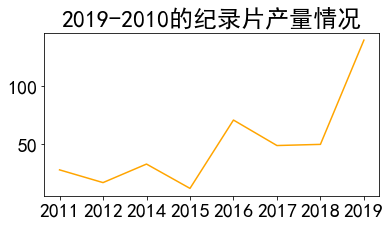

In [35]:
#分析同一年中纪录片的产量情况折线图*****************
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['font.size'] = 20
print(df['drama_time'].value_counts().head(100))
#可视化-----各个年份中的纪录片的增长情况****
fig=plt.figure(figsize=(6,3))#指定画布大小
y=[28,17,33,12,71,49,50,140]
x=['2011','2012','2014','2015','2016','2017','2018','2019']
plt.plot(x,y,c='orange')
plt.title('2019-2010的纪录片产量情况')
plt.show()
print()

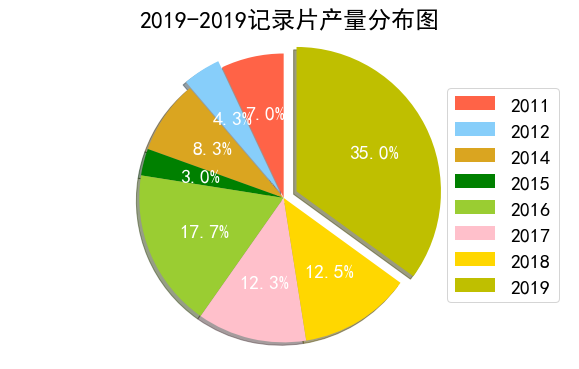

In [36]:
#分析同一年中纪录片的产量情况饼图*****************
plt.figure(figsize=(10, 6))
explode = (0, 0.05, 0, 0,0,0,0,0.1)
colors = ['tomato', 'lightskyblue', 'goldenrod', 'green','yellowgreen','pink','gold', 'y']

plt.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True,  labeldistance = 1.1,colors=colors,pctdistance=0.6,textprops={'fontsize': 20, 'color': 'w'},startangle=90)
plt.title('2019-2019记录片产量分布图')
plt.axis('equal')
plt.legend(loc='right')
plt.show()
